In [17]:
import util

In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("WorldStrat Dataset.csv", index_col=0).loc[~df.index.duplicated(keep='first')]
df

,n,bounds,lowres_date,highres_date,area,cloud_cover,delta,lon,lat,LCCS,SMOD,IPCC Class,LCCS class,SMOD Class
Amnesty POI-10-1-1,1,"[105.84161265950597, 13.147748954631947, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-2,1,"[105.84161265950597, 13.162040839281076, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-1-3,1,"[105.84161265950597, 13.176332723930203, 105.8...",2019-01-06,2019-01-27,2.5,0.06,-21,105.848905,13.183479,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-1,1,"[105.8561973580532, 13.147748954631947, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.154895,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
Amnesty POI-10-2-2,1,"[105.8561973580532, 13.162040839281076, 105.87...",2019-01-06,2019-01-27,2.5,0.06,-21,105.863490,13.169187,50,11,Forest,"Tree cover, broadleaved, evergreen, closed to ...",Rural: Very Low Dens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNHCR-NGAs035354,1,"[13.778820599146073, 11.218193050313346, 13.79...",2017-11-05,2017-11-08,2.5,0.00,-3,13.786060,11.225340,190,11,Settlement,Urban areas,Rural: Very Low Dens
UNHCR-MMRs035425,1,"[93.47666334949932, 20.0770397931716, 93.49178...",2021-04-18,2021-04-18,2.5,0.31,0,93.484222,20.084181,40,11,Agriculture,"Mosaic natural vegetation (tree, shrub, herbac...",Rural: Very Low Dens
UNHCR-CMRs004018,1,"[14.592949197448435, 6.726291317447426, 14.607...",2019-12-05,2019-12-10,2.5,0.00,-5,14.600100,6.733440,62,11,Forest,"Tree cover, broadleaved, deciduous, open (15‐40%)",Rural: Very Low Dens
UNHCR-CMRs004005,1,"[14.942548959144071, 6.742551322195224, 14.956...",2018-12-10,2018-10-20,2.5,0.00,51,14.949700,6.749700,190,23,Settlement,Urban areas,Urban: Dense


<AxesSubplot: >

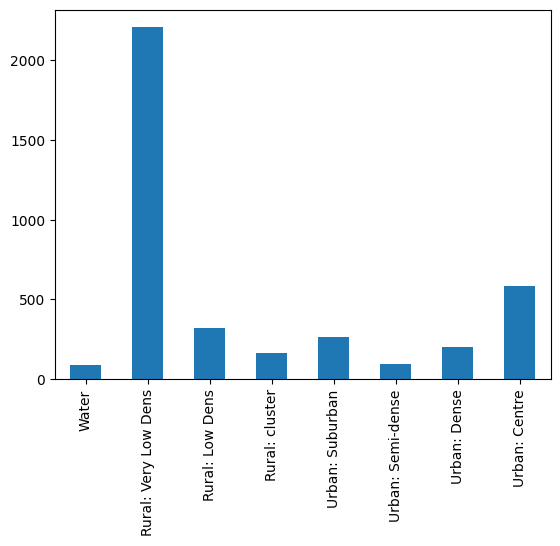

In [16]:
df["SMOD Class"].value_counts().reindex(['Water', 'Rural: Very Low Dens', 'Rural: Low Dens', 'Rural: cluster', 'Urban: Suburban', 
                                            'Urban: Semi-dense', 'Urban: Dense', 'Urban: Centre']).plot(kind='bar')

In [18]:
high_res = np.load("high_res.npy")

In [19]:
y, train, val, test = util.get_labels_and_split()
y_train, y_val, y_test = y[train], y[val], y[test]

In [20]:
high_res_mean = high_res.mean(axis=1)
high_res_mean

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [10.78652751, 12.71821632,  9.96110057],
        [10.70967742, 12.60721063,  9.86907021],
        [10.67457306, 12.58254269,  9.87001898]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 4.37286528,  6.24573055,  4.20208729],
        [ 4.31024668,  6.16223909,  4.14136622],
        [ 4.16888046,  5.94497154,  4.0028463 ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 4.07590133,  6.17077799,  4.11385199],
        [ 4.02751423,  6.07590133,  4.0426945 ],
        [ 3.99525617,  6.03889943,  4.01518027]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [21]:
high_res_mean_real = high_res_mean.mean(axis=1)
high_res_mean_real

array([[ 6.62690608,  8.66669307,  6.21661944],
       [ 4.37977939,  6.35173586,  4.28373072],
       [ 3.9071694 ,  5.97499631,  4.00947686],
       ...,
       [74.74038721, 75.41409071, 74.69526949],
       [13.87159515, 13.04177994, 11.2414458 ],
       [18.66634021, 15.61855082, 12.01975217]])

In [23]:
X_train = high_res_mean_real[train]
X_val = high_res_mean_real[val]
X_test = high_res_mean_real[test]

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', max_iter=5000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [27]:
predictions = lr.predict(X_val)

In [29]:
(predictions == y_val).mean()

0.5440414507772021

In [34]:
(1 == y_val).mean()

0.5544041450777202